# Отбор признаков

**Отбор признаков** – это отбор подмножества важных признаков для последующего построения модели машинного обучения.

Почему отбор фич (признаков) вообще необходим. Основных причин две.
- во-первых, если фич очень много, то увеличивается время работы классификатора. Если стоит цель протестировать несколько классификаторов с целью выбора лучшего, то время необходимое на вычисления может стать просто огромным.
- кроме того, данные (тренировочный сет) могут перестать помещаться в оперативную память, тогда придется модифицировать алгоритмы классификаторов. Может перестать помещаться даже одна строка сета, хотя это уже редкий случай.
- улучшение обобщающей способности модели из-за уменьшения проклятия размерности и переобучения
(удаление избыточных и нерелевантных переменных делает модель менее сложной и менее восприим-
чивой к случайным возмущениям обучающих данных, которые сложной моделью будут восприняты за
сигнал);
- сокращение времени обучения;
- простые модели легче интерпретировать;
- простые модели легче имплементировать.

Главная причина все-таки вторая — с увеличением количества фич часто падает точность предсказания. Особенно если в данных много мусорных фич (мало коррелирующих с целевой переменной). Это явление называется переобучение (`overfitting`).

Обычно выделяют задачу-минимум и задачу-максимум.
- Задача-минимум – сократить признаковое пространство без потери качества.
- Задача-максимум – сократить признаковое пространство и при этом улучшить качество модели.



Как правило, методы отбора признаков характеризуются высокими вычислительными затратами, один и
тот же метод отбора признаков для разных методов машинного обучения может дать разные подмножества
признаков. Не существует одного оптимального метода отбора признаков. Вопрос «какой метод отбора
признаков является лучшим?» тождествен вопросу «какой метод машинного обучения является лучшим?».
Поэтому каждый раз берем задачу и пробуем разные методы отбора признаков. Важный признак является
реле- вантным (связан с зависимой переменной) и неизбыточным (дает новую информацию, еще не объясненную другими признаками).

Методы отбора фич делятся на три категории:

•	методы фильтрации (filter methods);

•	методы "обёртки" (wrapper methods);

•	встроенные методы (embedded methods);

•	отбор с использованием моделей.

Кроме того, можно выделить гибридные подходы, сочетающие методы- обертки и встроенные методы.
Кстати, именно они на практике часто дают наилучшие результаты.


## Методы фильтрации (filter methods).

Они основаны на статистических методах и, как правило, рассматривают каждую фичу независимо. Позволяют оценить и ранжировать фичи по значимости, за которую принимается степень корреляции этой фичи с целевой переменной. Рассмотрим несколько примеров.

В их основе – следующая процедура:

- получаем оценку каждого признака по отдельности с точки зрения определенного критерия (например, с точки зрения IV), таким образом, отбор является одномерным;
- ранжируем признаки по полученным оценкам;
- выбираем признаки с наиболее высокой оценкой.




Методы-фильтры не годятся для отбора сильных переменных. Они могут отбирать избыточные переменные, поскольку преимущественно являются одномерными и не учитывают взаимосвязи между признаками (за исключением методов-фильтров на основе корреляции). Мы оцениваем, как признак работает сам по себе, а не в сочетании с другими признаками. Методы-фильтры хороши для быстрого мониторинга и удаления наименее релевантных признаков (константных, дублирующихся признаков) на самом раннем этапе отбора признаков.
Примерами методов-фильтров может быть отбор признаков по:
- информационному значению (чем выше значение IV, тем выше прогнозная сила);
- взаимной информации (насколько информация, содержащаяся в признаке, снижает неопределенность
относительно зависимой переменной; если признак и целевая переменная не зависят друг от друга, взаимная информация равна 0);
- дисперсии (низкая оценка дисперсии может указывать на почти константный признак);
- критерию хи-квадрат или F-критерию (чем выше значение хи-квадрат/ F-критерий и ниже p-значение,
тем переменная важнее);
- коэффициенту корреляции (есть корреляция с зависимой переменной – хороший признак, есть корреляция с другим признаком – избыточный признак);
- метрике (чем выше AUC, тем важнее признак).


## Сбор информации (Information Gain, IG).

Вычисляет уменьшение энтропии в результате преобразования набора данных. Его можно использовать для отбора признаков путем оценки информационного прироста каждой переменной в контексте целевой переменной.

![img](https://drive.google.com/uc?id=1mSj8MX3Ytptr77vNyOAiCgVcW67y2Hzt)

Чтобы лучше понять смысл этой меры, можно представить два простых примера.

Во-первых, подбрасывание монетки, у которой выпадение орла и решки равновероятны. В этом случае энтропия, рассчитанная по формуле, будет равна 1. Если же монета всегда падает исключительно орлом вверх, то энтропия будет равна 0. Иными словами высокая энтропия говорит о равномерном распределении, низкая — о каком-то более интересном.

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('../dataset/car5.csv', delimiter=',')
data = df.select_dtypes(include=[np.number])
data

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,MSRP
0,2011,335.0,6.0,2.0,26,19,46135
1,2011,300.0,6.0,2.0,28,19,40650
2,2011,300.0,6.0,2.0,28,20,36350
3,2011,230.0,6.0,2.0,28,18,29450
4,2011,230.0,6.0,2.0,28,18,34500
...,...,...,...,...,...,...,...
11186,2012,300.0,6.0,4.0,23,16,46120
11187,2012,300.0,6.0,4.0,23,16,56670
11188,2012,300.0,6.0,4.0,23,16,50620
11189,2013,300.0,6.0,4.0,23,16,50920


In [2]:
col = data.shape[1]-1
X=data.iloc[:,:col]
y=data.iloc[:,col]

[mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif)

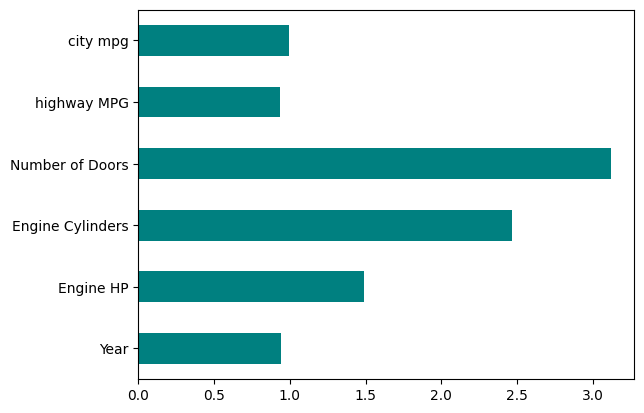

Number of Doors     3.119171
Engine Cylinders    2.465471
Engine HP           1.488162
city mpg            0.992433
Year                0.941488
highway MPG         0.932842
dtype: float64

In [3]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X, y)
feature_importances = pd.Series(importances,X.columns)
feature_importances.plot(kind='barh', color='teal')
plt.show()
feature_importances.sort_values(ascending=False)

In [4]:
# data_new = df.drop(['highway MPG'], axis=1).drop(['city mpg'], axis=1).drop(['Year'], axis=1)
# data_new = df.drop(['Engine HP'], axis=1).drop(['Number of Doors'], axis=1)
data_new.to_csv(path_or_buf='../dataset/car60.csv',index=False)
# df.to_csv(path_or_buf='../dataset/car62.csv',index=False)
data_new.select_dtypes(include=[np.number])

,Year,Engine Cylinders,highway MPG,city mpg,MSRP
0,2011,6.0,26,19,46135
1,2011,6.0,28,19,40650
2,2011,6.0,28,20,36350
3,2011,6.0,28,18,29450
4,2011,6.0,28,18,34500
...,...,...,...,...,...
11186,2012,6.0,23,16,46120
11187,2012,6.0,23,16,56670
11188,2012,6.0,23,16,50620
11189,2013,6.0,23,16,50920


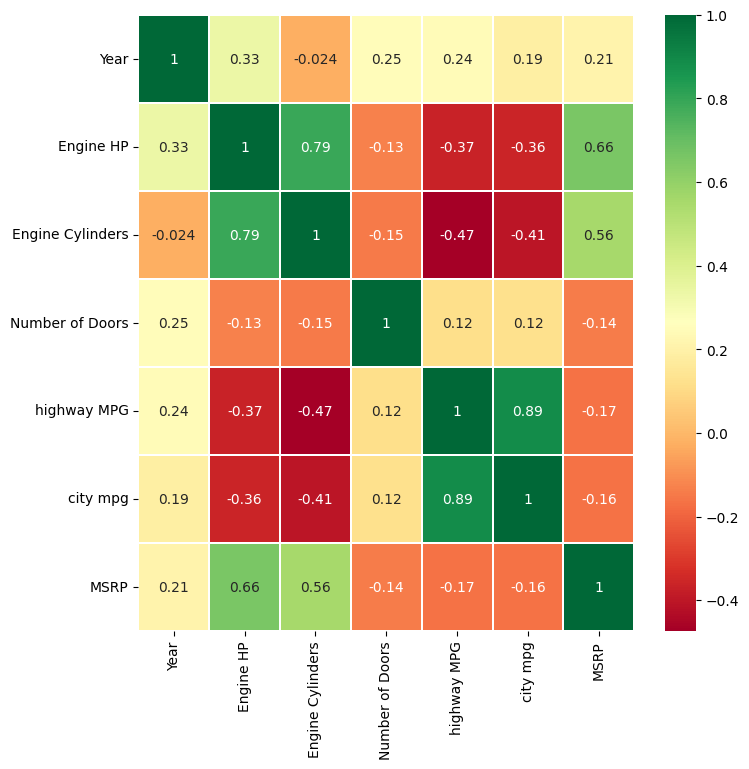

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

## Критерий хи-квадрат (Chi-square Test)

Взаимная информация измеряет взаимную зависимость двух переменных X и Y. Другими словами, она определяет, насколько точно мы можем определить переменную Y, зная переменную X. Здесь нас интересует, насколько совместное распределение P(X,Y) похоже на произведение маргинальных распределений P(X)P(Y). Если X и Y независимы, то взаимная информация будет равна нулю.

Используется для категориальных признаков в датасете. Мы вычисляем хи-квадрат между каждым признаком и целью, после выбираем желаемое количество “фич” с лучшими показателями. Чтобы правильно применить критерий для проверки связи между различными функциями в наборе данных и целевой переменной, должны быть выполнены следующие условия: категориальные переменные, которые выбираются независимо, и частота значений > 5.

Тест Хи-квадрат предполагает нулевую гипотезу о том, что две переменные независимы, и альтернативную гипотезу о том, что две переменные зависимы, как и большинство других статистических тестов. Используя критерий хи-квадрат, он вычисляет p-значения каждого объекта относительно целевого объекта. Проще говоря, p - это вероятность того, что две переменные независимы. Наша цель состоит в том, чтобы определить функции, которые зависят от цели, другими словами, отвергая нулевую гипотезу. По этой причине мы выбираем объекты, у которых обычно значение p меньше 0,05. Пороговое значение 0.05 - это просто обычное поведение, вы можете установить меньшие пороговые значения, например 0.01, чтобы быть более уверенным в том, что две группы зависят друг от друга.

И  критерий  хи-квадрат,  и  критерий  Фишера  из-за  использования p-значений чувствительны к размеру выборки, поэтому на больших выборках большинство признаков будут значимыми. Вы должны помнить, что низкое p-значение может указывать не на высокую прогнозную силу переменной, а просто на тот факт, что мы работаем с большим набором данных. Поэтому полезнее смотреть не на сами
p-значения, а сравнивать эти p-значения между собой.




              Specs          Score
1         Engine HP  493566.875498
5          city mpg   28859.330500
4       highway MPG   20267.519895
2  Engine Cylinders    4959.318209
3   Number of Doors    1601.230685
0              Year     259.087269


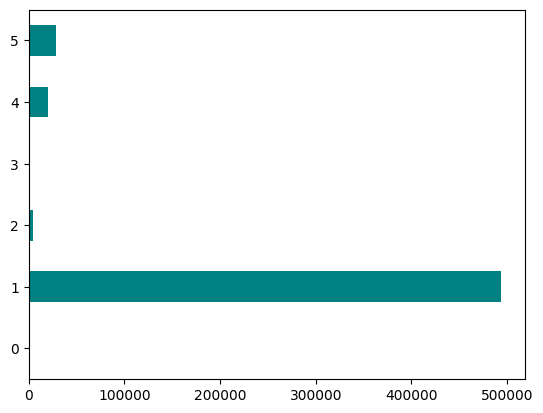

In [6]:
# примените класс SelectKBest, чтобы извлечь лучшие показатели
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = df.select_dtypes(include=[np.number])
X=data.iloc[:,:col]
y=data.iloc[:,col]

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#объединим два фрейма данных для лучшей визуализации
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #название показателей
print(featureScores.nlargest(11,'Score'))

feature_importances = pd.Series(featureScores['Score'])
feature_importances.plot(kind='barh', color='teal')
plt.show()

## Методы обертки.
Суть этой категории методов в том, что классификатор запускается на разных подмножествах фич исходного тренировочного сета. После чего выбирается подмножество фич с наилучшими параметрами на обучающей выборке. А затем он тестируется на тестовом сете (тестовый сет не участвует в процессе выбора оптимального подмножества).

Методы-обертки используют методы машинного обучения, таким образом, зависят от моделей машинного
обучения. В их основе – следующая процедура:
- находим подмножество признаков;
- строим модель машинного обучения на этом подмножестве признаков;
- оцениваем качество модели;
- повторяем.


Есть два подхода в этом классе методов — методы включения (`forward selection`) и исключения (`backwards selection`) фич. Первые стартуют с пустого подмножества, куда постепенно добавляются разные фичи (для выбора на каждом шаге оптимального добавления). Во втором случае метод стартует с подмножества равного исходному множеству фич, и из него постепенно удаляются фичи, с пересчетом классификатора каждый раз.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# разбиваем набор данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data.drop('MSRP', axis=1),data['MSRP'],test_size=0.3,random_state=42)

# создаем список признаков
col_list = X_train.select_dtypes(include=[np.number]).columns
print(col_list)
print(X_train.shape, y_train.shape)


Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg'],
      dtype='object')
(7833, 6) (7833,)


In [ ]:
# вычисляем AUC для модели с одним признаком,
# используя перекрестную проверку
log = LogisticRegression(solver='liblinear')
auc=cross_val_score(log, X_train, y_train, cv=5, scoring='roc_auc')

# превращаем список со значениями AUC в серию
auc_values = pd.Series(auc)
print(auc_values)

C:\Users\iteco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\iteco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\iteco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\iteco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\iteco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\mod

In [ ]:
# сортируем по убыванию
auc_values = auc_values.sort_values(ascending=False)
auc_values

In [ ]:
# формитруем датасет только из информативных показателей
x_1=X.iloc[:,auc_values.index]#3
x_1

## Прямой отбор признаков.
Это крайне прямолинейный метод, в котором мы начинаем с наиболее эффективной переменной по отношению к цели. Затем мы выбираем другую переменную, которая дает лучшую производительность в сочетании с первой. Этот процесс продолжается до тех пор, пока не будет достигнут заданный критерий.

## Рекурсивное исключение признаков.

Сначала модель обучается на начальной выборке признаков, и важность каждой функции определяется либо с помощью атрибута `coef_` или `feature_importances_`. Затем наименее важные “фичи” удаляются из текущего набора. Процедура рекурсивно повторяется для сокращенного набора до тех пор, пока в конечном итоге не будет достигнуто желаемое количество признаков для выбора.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

threshold = 4 # the number of most relevant features

lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=42, n_jobs=-1, max_iter=50)

rfe = RFE(lr, n_features_to_select=5)
rfe=rfe.fit(X, y)
# X_train, y_train - входные и выходные данные с обучающей выборки соответственно.
selector_ind = rfe.get_support()
df_rfe = X.iloc[:, selector_ind]
print(df_rfe.columns)

Вместе с тем методы-обертки, в отличие от методов-фильтров, чаще позволяют найти подмножество
признаков, дающее наилучшее качество модели. Это обусловлено тем, что в отличие от методов-фильтров
они могут учитывать взаимодействия переменных. Вы должны помнить, что некоторые признаки могут не обладать прогнозной силой по отдельности, но в сочетании с другими переменными приобретают ее.

Разумеется, с помощью метода-обертки мы не можем получить подмножество признаков, которое даст наилучшее качество при использовании разных моделей машинного обучения.

*Например, подмножество признаков, найденное с помощью логистической регрессии, не гарантирует наилучшего качества при построении градиентного бустинга на этом подмножестве. В то же время подмножество признаков,
отобранное с помощью градиентного бустинга, может дать хорошее качество при построении на этом подмножеств случайного леса. Поэтому, выбирая метод-обертку, нужно помнить о том, какую модель машинного обучения мы потом будем строить на отобранном подмножестве признаков.*


## Встроенные методы (`embedded methods`).
Эти методы включают в себя преимущества первых двух, а также уменьшают вычислительные затраты. Отличительной особенностью встроенных методов является извлечение “фич” на этапе конкретной итерации.

Встроенные методы выполняют отбор признаков в ходе обучения модели машинного обучения. В их основе – следующая процедура:
- обучаем модель машинного обучения;
- вычисляем важности признаков;
- удаляем неважные признаки (в случайном лесе или бустинге для этого задается определенный порог, ниже которого считаем признаки неважными, в методе LASSO неважные признаки просто получат нулевые коэффициенты и будут исключены из модели).




Основным методом из этой категории является регуляризация. Существуют различные ее разновидности, но основной принцип общий. Если рассмотреть работу классификатора без регуляризации, то она состоит в построении такой модели, которая наилучшим образом настроилась бы на предсказание всех точек тренировочного сета.

Например, если алгоритм классификации линейная регрессия, то подбираются коэффициенты полинома, который аппроксимирует зависимость между фичами и целевой переменной. В качестве оценки качества подобранных коэффициентов выступает среднеквадратичная ошибка (`RMSE`). Т.е. параметры подбираются так, чтобы суммарное отклонение (точнее суммарный квадрат отклонений) у точек, предсказанных классификатором от реальных точек, было минимальным.
Идея регуляризации в том, чтобы построить алгоритм минимизирующий не только ошибку, но и количество используемых переменных.



## Регуляризация LASSO (L1).
Регуляризация состоит в добавлении штрафа (penalty) к различным параметрам модели во избежание чрезмерной подгонки. При регуляризации линейной модели штраф применяется к коэффициентам, умножающим каждый из предикторов. Lasso-регуляризация обладает свойством, позволяющим уменьшить некоторые коэффициенты до нуля. Следовательно, такие “фичи” можно будет просто удалить из модели.

![img](https://drive.google.com/uc?id=1pAFQRa8I_-twxgh_2qbkrjJHoezkrY7i)

В процессе работы алгоритма размеры коэффициентов будут пропорциональны важности соответствующих переменных, а перед теми переменными, которые дают наименьший вклад в устранение ошибки, станут околонулевые. В LASSO с ростом альфа все больше коэффициентов становятся нулевыми и совсем перестают вносить вклад в модель. Таким образом, мы получаем действительно отбор фич. Более значимые фичи сохранят свои коэффициенты ненулевыми, менее значимые — обнулятся.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Устанавливаем наш параметр регуляризации C=1
logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state=7).fit(X, y)
# Где X, y - входные и выходные данные соответственно.
model = SelectFromModel(logistic, prefit=True)

X_new = model.transform(X)

# выводим финальную оценку прогнозирования.
selector_ind = model.get_support()
df_rfe1 = X.iloc[:, selector_ind]
print(df_rfe1.columns)


In [ ]:
X_new

## Регуляризация Тихонова (L2).

Суть в том, что чересчур тяжёлые весовые коэффициенты «отталкивают» нашу линию наилучшего соответствия, построенную на основе минимизации квадрата ошибок, от основной тендеции.

![img](https://drive.google.com/uc?id=1_B9TGeTVXUK5F8iPnF1JJL-x1GSw7BXZ)

Тут получается, что функция занижает пики прибавляя сумму весов в квадрате с множителем лямбда.
Происходит легкое смещение добавляя статистическую ошибку, которая не влияет на точность, но позволяет не переобучиться. Соответственно если вы поставите большую коэффициент (лямбда) L2, то система никогда не обучится, просто из-за того, что сильно сместиться. Но если лямбда будет маленькой, то и смещение будет маленьким, и весь смысл регуляризации так же будет минимальным.


In [ ]:
from sklearn.linear_model import Ridge
import numpy as np
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
clf = Ridge(alpha=1.0)
clf.fit(X, y)
clf.coef_

**Как видно из конечных наборов функций, мы получаем разные результаты для разных подходов, поэтому нет определенной истины в выборе функций.**

Методы фильтрации часто являются одномерными и учитывают признаки независимо или с учетом зависимой переменной. Однако это не всегда правильное предположение. Иногда функция сама по себе не имеет смысла, в то время как она может улучшить модель с помощью комбинаций других функций. Таким образом, подобные ситуации упускаются из виду в методах фильтрации. Кроме того, оценка статистических измерений для выбора признаков не способствует производительности модели, поэтому может не повысить точность модели. С другой стороны, эти подходы просты и выгодны по сравнению с другими в отношении времени обучения.

Методы-оболочки используют итеративные процедуры поиска и используются вместе с моделью. В отличие от методов фильтрации, он учитывает комбинации объектов и возвращает подмножество объектов. Это может быть реализовано жадным или нежадным способом. Жадные подходы, такие как RFE, могут столкнуться с такими проблемами, как попадание в ловушку локальных оптимумов. Как правило, они работают медленнее, чем методы фильтрации, поскольку требуют больших объемов вычислений с учетом итеративного подхода.

Встроенные методы работают быстрее, чем методы-оболочки, поскольку процесс выбора встроен в процесс подгонки модели. Они также обеспечивают прямую связь между выбором функций и производительностью модели. Таким образом, вы можете получить более удовлетворительные результаты с помощью встроенных методов. Одним из недостатков этого подхода является то, что он зависит от модели. Данные могут лучше соответствовать модели, которая неудобна для встроенных видов выбора функций.

### Комбинирование несколькиХ методов для отбора признаков


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     cross_validate)

# разбиваем набор данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data.drop('MSRP', axis=1),data['MSRP'],test_size=0.3,random_state=42)

# Сначала ищем оптимальный темп обучения для зафиксированного количества деревьев

# создаем экземляр класса LGBMClassifier
lgbm_model = LGBMClassifier(random_state=42,n_estimators=300)
# задаем сетку гиперпараметров
param_grid = {
              'learning_rate': [0.01, 0.05, 0.1]
              }
# создаем экземпляр класса GridSearchCV, передав
# конвейер, сетку гиперпараметров и указав
# количество блоков перекрестной проверки
gs = GridSearchCV(lgbm_model,param_grid, scoring='roc_auc', cv=5)

# выполняем поиск по всем значениям сетки
gs.fit(X_train, y_train);

# смотрим наилучшие значения гиперпараметров
print("Наилучшие значения гиперпараметров: {}".format( gs.best_params_))
# смотрим наилучшее значение AUC
print("Наилучшее значение AUC: {:.3f}".format(gs.best_score_))


In [ ]:
# Теперь ищем с помощью обычного поиска по сетке оптимальные значения гиперпараметров
# Гиперпараметр lambda_l1 - задает штрафной коэффициент перед L1-нормой вектора весов листьев (по умолчанию 0).
# Гиперпараметр bagging_ fraction - задает случайный отбор наблюдений без возвращения.
# Он может принимать значения от 0 до 1
# Гиперпараметр feature_fraction - задает случайный отбор признаков для каждого дерева.
# Он может принимать значения от 0 до 1

# создаем экземляр класса LGBMClassifier
lgbm_model2 = LGBMClassifier(random_state=42,
                             n_estimators=300,
                             learning_rate=0.01)

# задаем сетку гиперпараметров
param_grid2 = {
    'lambda_l1': [0, 10],
    'bagging_fraction': [0.5, 1],
    'feature_fraction': [0.5, 1]
}

# создаем экземпляр класса GridSearchCV, передав
# конвейер, сетку гиперпараметров и указав
# количество блоков перекрестной проверки
gs2 = GridSearchCV(lgbm_model2,
                   param_grid2,
                   scoring='roc_auc',
                   cv=5)

# выполняем поиск по всем значениям сетки
gs2.fit(X_train, y_train)

# смотрим наилучшие значения гиперпараметров
print('Наилучшие значения гиперпараметров: {}'.format(gs2.best_params_))
# смотрим наилучшее значение AUC
print('Наилучшее значение AUC: {:.3f}'.format(gs2.best_score_))


In [ ]:
# Теперь вычислим важности признаков на основе информационного выигрыша.


# создаем экземляр класса LGBMClassifier
model_all_features = LGBMClassifier(
    random_state=42, learning_rate=0.01,
    n_estimators=300, bagging_fraction=0.5,
    feature_fraction=1, lambda_l1=10,
    importance_type='gain')

# выполняем перекрестную проверку и сохраняем результат
# с помощью функции cross_validate()
output = cross_validate(
    model_all_features, X_train, y_train, cv=5,
    scoring='roc_auc', return_estimator=True)

# создаем список fi, в который будем сохранять
# важности признаков, и сохраняем в него важности,
# рассчитанные для каждой из моделей
fi = []
for estimator in output['estimator']:
    fi.append(estimator.feature_importances_)

# преобразовываем список в датафрейм, индексы в котором
# будут именами наших переменных
fi = pd.DataFrame(
    np.array(fi).T,
    columns=['importance ' + str(idx)
             for idx in range(len(fi))],
    index=X_train.columns)
# вычисляем усредненные важности и добавляем столбец с ними
fi['mean_importance'] = fi.mean(axis=1)
# смотрим полученный датафрейм
fi

Здесь мы видим, что некоторые признаки имеют нулевые или очень низкие важности.


In [ ]:
# записываем серию, в которой индексные метки - признаки,
# значения - важности
features = fi['mean_importance']
# сортируем индексные метки по возрастанию важностей
features = features.sort_values(ascending=True)
features

In [ ]:
# выводим график усредненных важностей
features.plot.barh(figsize=(5, 10));

In [ ]:
# создаем список признаков
features = list(features.index)
features

In [ ]:
# вычисляем оценку AUC-ROC, усредненную по 5 проверочным
# блокам перекрестной проверки (5 моделям со всеми
# признаками)
auc_score_all = output['test_score'].mean()
auc_score_all

In [ ]:
# задаем пороговое значение разницы AUC
tol = 0.0001

print("выполнение последовательного удаления признаков")

# создаем список, в который будем
# записывать удаляемые признаки
features_to_remove = []
# создаем список, в который будем
# записывать значение AUC
auc_score_mean_list = []
# создаем список, в который будем
# записывать разницу AUC
diff_auc_list = []

# задаем счетчик для оценки прогресса
count = 1

# итерируем по всем признакам, признаки упорядочены по
# возрастанию важности на основе информационного выигрыша
for feature in features:
    print()
    print("проверяемый признак: ", feature, " признак ", count,
          " из ", len(features))
    count = count + 1

    # создаем экземляр класса LGBMClassifier
    model = LGBMClassifier(
        random_state=42, learning_rate=0.01,
        n_estimators=300, bagging_fraction=0.5,
        feature_fraction=1, lambda_l1=10)

    # обучаем модели со всеми признаками минус уже удаленные признаки
    # (берем их из списка удаляемых признаков) и оцениваемый признак
    auc_scores = cross_val_score(
        model,
        X_train.drop(features_to_remove + [feature], axis=1),
        y_train,
        scoring='roc_auc',
        cv=5)
 # вычисляем AUC, усредненный по проверочным блокам
    # перекрестной проверки
    auc_score_mean = auc_scores.mean()

    # печатаем усредненное значение AUC
    print("AUC модели после удаления={}".format((auc_score_mean)))

    # добавляем усредненное значение AUC в список
    auc_score_mean_list.append(auc_score_mean)

    # печатаем AUC модели со всеми признаками
    # (опорное значение AUC)
    print("AUC модели со всеми признаками={}".format((auc_score_all)))

    # определяем разницу AUC (если отрицательное значение
    # - удаление признака улучшило AUC)
    diff_auc = auc_score_all - auc_score_mean

    # записываем разницу AUC в список
    diff_auc_list.append(diff_auc)

    # сравниваем разницу AUC с порогом, заданным заранее
    # если разница AUC больше или равна порогу, сохраняем
    if diff_auc >= tol:
        print("Разница AUC={}".format(diff_auc))
        print("сохраняем: ", feature)
        print

    # если разница AUC меньше порога, удаляем
    else:
        print("Разница AUC={}".format(diff_auc))
        print("удаляем: ", feature)
        print

        # если разница AUC меньше порога и мы удаляем признак,
        # мы в качестве нового опорного значения AUC задаем
        # значение AUC для модели с оставшимися признаками
        auc_score_all = auc_score_mean
 # добавляем удаляемый признак в список
        features_to_remove.append(feature)

# формируем датафрейм
df = pd.DataFrame({'feature': features,
                   'auc_score_mean': auc_score_mean_list,
                   'diff_auc_score': diff_auc_list})

# цикл завершен, вычисляем количество
# удаленных признаков
print("ВЫПОЛНЕНО!!")
print("общее количество признаков для удаления: ",
      len(features_to_remove))

# определяем признаки, которые мы хотим сохранить (не удаляем)
features_to_keep = [x for x in features
                    if x not in features_to_remove]
print("общее количество признаков для сохранения: ",
      len(features_to_keep))

In [ ]:
dgg_new= []
for col in features_to_keep:
    dgg_new.append(data[col])
dff1 = pd.DataFrame(dgg_new)
# dff1.to_csv(path_or_buf='../dataset/car6.csv',index=False)
dff1

**Отбор признаков – это тоже модель, либо использующая вычисление статистик признаков (в случае с методами-фильтрами), либо использующая параметры моделей машинного обучения (в случае с методами-обертками и встро- енными методами), поэтому модели отбора признаков строим на обучающей выборке, настраиваем гиперпараметры на проверочной выборке и получаем итоговую оценку качества на тестовой.**



на логистической регрессии попробовать, если отобранные признаки плохо прогнозируют, надо вернуть к этой лабе и попробовать другие признаки